# Matplotlib Foarmatting Charts

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ezequ\anaconda3\envs\luke_b\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


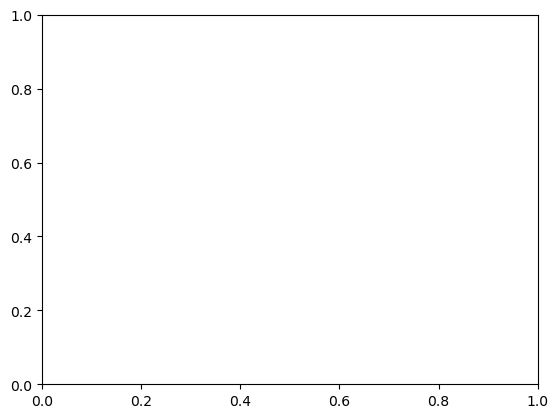

In [ ]:
fig, ax = plt.subplots()

# fig represents the entire figure
# ax represents an individual subplot within the figure

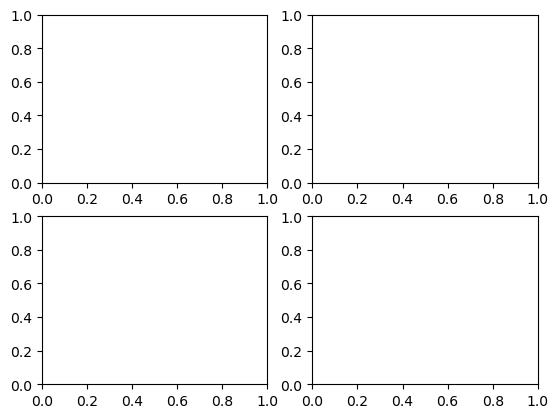

In [ ]:
fig, ax = plt.subplots(2, 2)

# we can add the quantity of subplots inside the argument

<Axes: xlabel='job_title_short'>

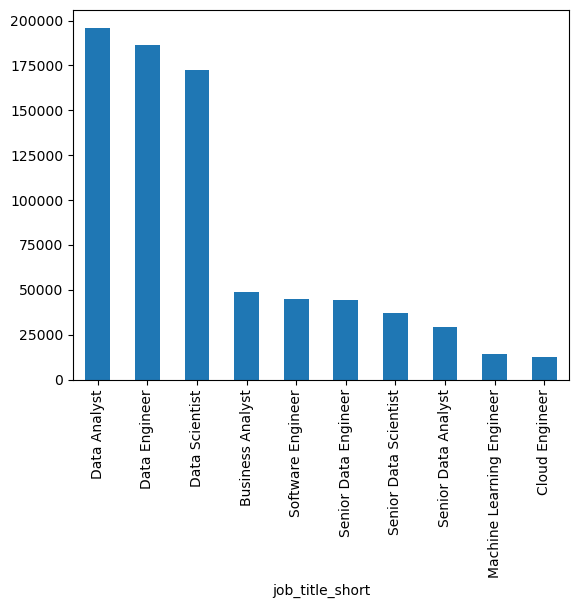

In [ ]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

# we're using the pandas methods to plot
# ax=ax integrates the plot in the figure managed by 'fig, ax'

In [10]:

df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

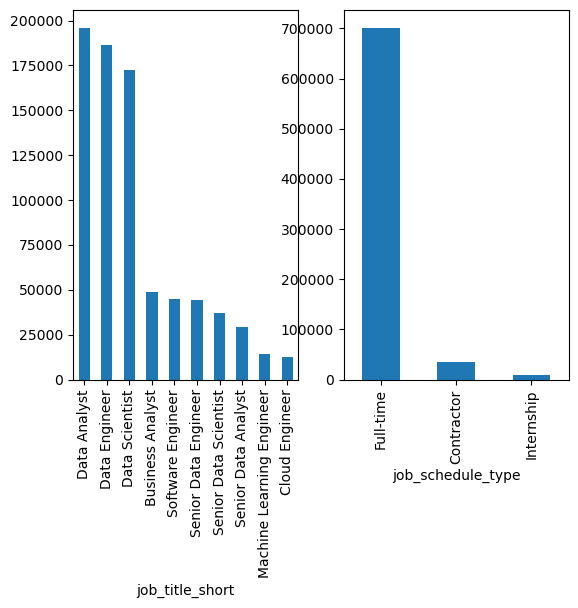

In [ ]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# the argument in ax=ax especifies the order and position in each one of them

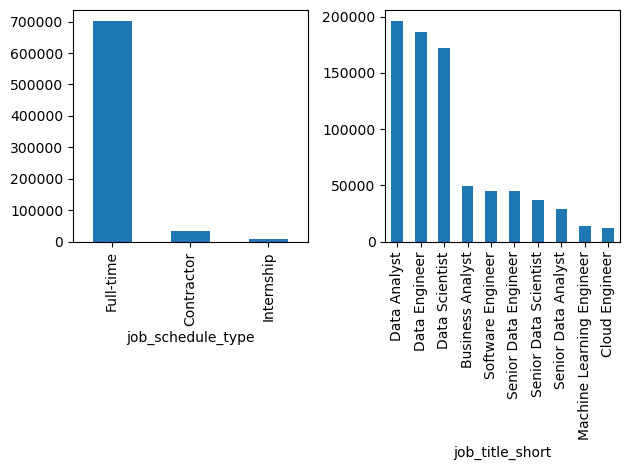

In [ ]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

# '.tight_layout()' downsizes the subplots

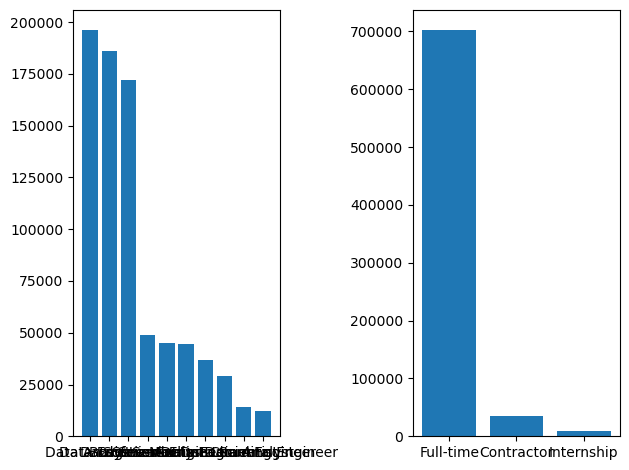

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

# this is the matplotlib method of plotting
# we're calling out each of the diferent axis and them runing the applicable method on it

plt.tight_layout()

# Example - Counts of Top Skills in Job Postings

In [16]:
# same dataframe of the explode lesson

# copy the dataframe
df_skills = df.copy()

# explode the skills out
df_skills = df_skills.explode('job_skills')

# group them
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# reset the index
df_skills_count = skills_count.reset_index(name='skill_count')

# sort the values
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [18]:
# create a list
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# we're gonna loop trought each ones of this diferent job titles
# so we can plot them

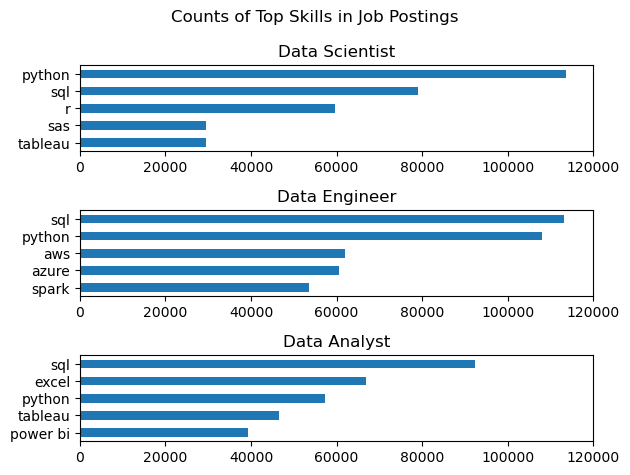

In [32]:
fig, ax = plt.subplots(3,1) # 3 rows, 1 column

# let's create a loop
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
